# Aufgabe 8: *Function* in *DataFrames*

## Theorie

Nun wollen wir usere Function `offset_coordinate()` auf alle Zeckenstich-Koordinaten anwenden. Bildlich gesprochen: Wir nehmen unsere Zeckenstichdatensatz und schütteln ihn einmal durch.

Nutze hier die Datei "zeckenstiche.csv" von letzter Woche (du kannst auch sie [hier erneut runterladen](https://raw.githubusercontent.com/ratnanil/codingingis/master/zeckenstiche.csv), Rechtsklick --> Ziel speichern unter).



In [1]:
# to add figures to images.. havent found out how to do this yet
from myst_nb import glue

In [6]:
import pandas as pd
import random

def offset_coordinate(old, distance = 100):
    new = old + random.normalvariate(0,distance)
    return new

zeckenstiche = pd.read_csv("zeckenstiche.csv")


zeckenstiche

ID    accuracy        x        y
0   2550  439.128951  2681116  1250648
1  10437  301.748542  2681092  1250672
2   9174  301.748542  2681128  1250683
3   8773  301.748542  2681111  1250683
4   2764  301.748529  2681131  1250692
5   2513  301.748529  2681171  1250711
6   9185  301.748542  2681107  1250712
7  28521  301.748542  2681124  1250720
8  26745  301.748542  2681117  1250725
9  27391  301.748542  2681138  1250725

## Übungen

### Übung 8.1: Alle Zeckenstiche zufällig verschieben

Nun können wir die *Function* `offset_coordinate()` auf die gesamte Spalten `x` und `y` der *DataFrame* zeckenstiche anwenden. Nutze eckige Klammern um die entsprechende Spalte zu wählen.

In [4]:
# Musterlösung

offset_coordinate(zeckenstiche["x"], distance = 100)
offset_coordinate(zeckenstiche["y"], distance = 100)

0    1.250702e+06
1    1.250726e+06
2    1.250737e+06
3    1.250737e+06
4    1.250746e+06
5    1.250765e+06
6    1.250766e+06
7    1.250774e+06
8    1.250779e+06
9    1.250779e+06
Name: y, dtype: float64

### Übung 8.2: Neue GeoDataFrame mit simulierten Punkten erstellen

Um die neuen, verschobenen Koordianten abzuspeichern erstellen wir zuerst eine neue, leere DataFrame (z.B. `zeckenstiche_sim`) und fügen den Output als neue Spalten dieser *DataFrame* hinzu. Auch die "ID" könnt ihr als neue Spalte hinzufügen, so behalten wir den Bezug zum ursprünglichen Datensatz.

In [5]:
# Musterlösung

zeckenstiche_sim = pd.DataFrame()

zeckenstiche_sim["ID"] = zeckenstiche["ID"]

zeckenstiche_sim["x"] = offset_coordinate(zeckenstiche["x"], distance = 100)
zeckenstiche_sim["y"] = offset_coordinate(zeckenstiche["x"], distance = 100)
zeckenstiche_sim

ID             x             y
0   2550  2.681261e+06  2.681140e+06
1  10437  2.681237e+06  2.681116e+06
2   9174  2.681273e+06  2.681152e+06
3   8773  2.681256e+06  2.681135e+06
4   2764  2.681276e+06  2.681155e+06
5   2513  2.681316e+06  2.681195e+06
6   9185  2.681252e+06  2.681131e+06
7  28521  2.681269e+06  2.681148e+06
8  26745  2.681262e+06  2.681141e+06
9  27391  2.681283e+06  2.681162e+06

### Übung 8.4: Mehrere *DataFrames* visualisieren

Um zwei *DataFrames* im gleichen Plot darzustellen, wird folgendermassen vorgegangen. Der erste Datensatz wird mit `.plot()` visualisiert, wobei der Output einer Variabel  (z.B. `basemap`)  zugewiesen wird. Danach wird der zweite Datensatz ebenfalls mit `.plot()` visualisiert, wobei auf den ersten Plot via dem Argument `ax` verwiesen wird.

<AxesSubplot:xlabel='x', ylabel='y'>

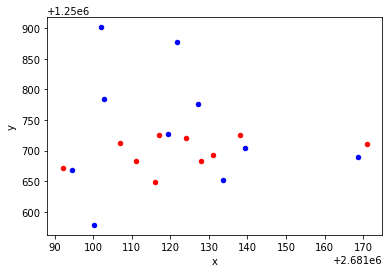

In [32]:
# Musterlösung

basemap = zeckenstiche.plot.scatter("x", "y", color = "red")
zeckenstiche_sim.plot.scatter("x", "y", ax = basemap, color = "blue")

Bei den roten Punkten handelt es sich um die Original-Zeckenstichen, bei den blauen um die simulierten (leicht verschoben) Zeckenstiche.

### Übung 8.5: Genauigkeitsangaben der Punkte mitberücksichtigen.

Bisher haben wir alle Punkte um die gleiche Distanz verschoben. Wenn wir unsere *DataFrame* "zeckensiche" genau anschauen, steht uns eine Genauigkeitsangabe pro Punkt zur Verfügung: Die Spalte "accuracy". 

In [65]:
zeckenstiche

ID    accuracy        x        y
0   2550  439.128951  2681116  1250648
1  10437  301.748542  2681092  1250672
2   9174  301.748542  2681128  1250683
3   8773  301.748542  2681111  1250683
4   2764  301.748529  2681131  1250692
5   2513  301.748529  2681171  1250711
6   9185  301.748542  2681107  1250712
7  28521  301.748542  2681124  1250720
8  26745  301.748542  2681117  1250725
9  27391  301.748542  2681138  1250725

Diese Spalte sagt was darüber aus, wie sicher der/die Nutzer\*in bei der Standortsangabe war. Wir können diese Angabe auch nutzen um den offset *pro Punkt* festzulegen.

In [68]:
zeckenstiche_sim["x"] = offset_coordinate(zeckenstiche["x"], distance = zeckenstiche["accuracy"])

zeckenstiche_sim["y"] = offset_coordinate(zeckenstiche["y"], distance = zeckenstiche["accuracy"])

zeckenstiche_sim

ID             x             y
0   2550  2.680391e+06  1.250570e+06
1  10437  2.680594e+06  1.250619e+06
2   9174  2.680630e+06  1.250630e+06
3   8773  2.680613e+06  1.250630e+06
4   2764  2.680633e+06  1.250639e+06
5   2513  2.680673e+06  1.250658e+06
6   9185  2.680609e+06  1.250659e+06
7  28521  2.680626e+06  1.250667e+06
8  26745  2.680619e+06  1.250672e+06
9  27391  2.680640e+06  1.250672e+06